<a href="https://colab.research.google.com/github/rahiakela/practical-natural-language-processing/blob/chapter-4-text-classification/7_BERT_sentiment_classification_with_large_pre_trained_model_using_ktrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERT: Sentiment Classification with Large, Pre-Trained Language Models using Ktrain

In the past two years, there have been great improvements in using neural network–based text representations for NLP tasks.These representations have been used successfully for text classification in the recent past by fine-tuning the pre-trained models to the given task and dataset. BERT,is a popular model used in this way for Sentiment classification. 

Let’s take a look at how to use BERT for Sentiment classification using the IMDB dataset we used earlier in this section.

We’ll use [ktrain](https://github.com/amaiya/ktrain), a lightweight wrapper to train and use pre-trained DL models using the TensorFlow library Keras. ktrain provides a straightforward process for all steps, from obtaining the dataset and the pre-trained BERT to fine-tuning it for the classification task. 

In this notebook we build a binarry classifier for the IMDB Reviews Dataset using [BERT](https://arxiv.org/abs/1810.04805), a pre-Trained NLP model open soucred by google in late 2018 that can be used for [Transfer Learning](https://towardsdatascience.com/transfer-learning-in-nlp-fecc59f546e4) on textual data. The link for the dataset can be found [here](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews).

This notebook requires a GPU to get setup. We suggest you to run this on your local machine only if you have a GPU setup or else you can use google colab.

## Setup

In [ ]:
%%shell

# install ktrain 
pip install ktrain

In [2]:
import tensorflow as tf

In [3]:
import ktrain
from ktrain import text

In [4]:
import os.path

import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let’s see how to load the dataset first through the code snippet below:

In [5]:
# obtain the dataset
dataset = tf.keras.utils.get_file(fname="aclImdb.tar.gz", origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", extract=True)

84131840/84125825 [==============================] - 1s 0us/step


In [6]:
%cd /root/.keras/datasets/aclImdb
!ls

/root/.keras/datasets/aclImdb
imdbEr.txt  imdb.vocab	README	test  train


In [7]:
# set path to dataset
dataset = "/root/.keras/datasets/aclImdb"
IMDB_DATADIR = os.path.join(os.path.dirname(dataset), "aclImdb")
print(IMDB_DATADIR)

/root/.keras/datasets/aclImdb


## STEP 1: Preprocessing

Once the dataset is loaded, the next step is to download the BERT model and preprocess the dataset according to BERT’s requirements.

In [8]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_folder(IMDB_DATADIR, maxlen=500, preprocess_mode="bert",
                                                                       train_test_names=["train", "test"],
                                                                       classes=["pos", "neg"])

detected encoding: utf-8
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


##STEP 2: Loading a pre trained BERT and wrapping it in a ktrain.learner object

The next step is to load the pre-trained BERT model and fine-tune it for this dataset.

Next, we instantiate a Learner object and call the lr_find and lr_plot methods to help identify a good learning rate.

In [9]:
model = text.text_classifier("bert", (x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=6)

Is Multi-Label? False
maxlen is 500
done.


In [10]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
4167/4167 [==============================] - 1850s 439ms/step - loss: nan - accuracy: 0.5626


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


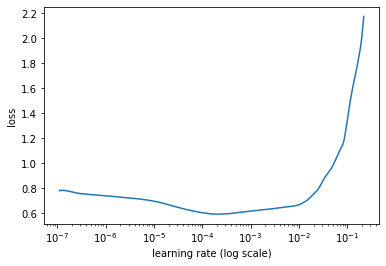

In [11]:
learner.lr_plot()

## STEP 3: Training and Tuning the model's parameters

Now we will train a text classifier using the BERT pre-trained model.

In [12]:
# 2e-5 is one of the LRs  recommended by Google and is consistent with the plot above.
learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
4167/4167 [==============================] - 5467s 1s/step - loss: 0.2662 - accuracy: 0.8868 - val_loss: 0.1869 - val_accuracy: 0.9268
Epoch 2/4
4167/4167 [==============================] - 5462s 1s/step - loss: 0.1664 - accuracy: 0.9386 - val_loss: 0.1784 - val_accuracy: 0.9331
Epoch 3/4
4167/4167 [==============================] - 5463s 1s/step - loss: 0.0869 - accuracy: 0.9704 - val_loss: 0.2012 - val_accuracy: 0.9278
Epoch 4/4
4167/4167 [==============================] - 5464s 1s/step - loss: 0.0232 - accuracy: 0.9936 - val_loss: 0.2460 - val_accuracy: 0.9390


**93.94% accuracy in a single epoch.**

## STEP-4: Making prediction on unseen data

Let's make some predictions on new data.

In [13]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [14]:
data = [
    'This movie was horrible! The plot was boring. Acting was okay, though.',
      'The film really sucked. I want my money back.',
    'The plot had too many holes.',
    'What a beautiful romantic comedy. 10/10 would see again!',
]

In [15]:
predictor.predict(data)

['neg', 'neg', 'neg', 'pos']

We’ve seen several approaches to building text classification models so far. Unlike heuristics-based approaches where the predictions can be justified by tracing back the rules applied on the data sample, ML models are treated as a black box while making predictions. However, in the recent past, the topic of interpretable ML started to gain prominence, and programs that can “explain” an ML model’s predictions exist now.